##Sistema de recomendación de películas


In [2]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
import numpy as np

In [ ]:
# URL del archivo en Google Drive
url = 'https://drive.google.com/uc?id=1daDoh1LbfpuFl4nX51jtc-O6-V_BWMIP'

# Descargar el archivo desde Google Drive
output = 'data.csv'
gdown.download(url, output, quiet=False)

# Cargar el archivo CSV en un DataFrame de pandas
data = pd.read_csv(output)

In [3]:
data = pd.read_csv('data.csv')

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
print(data.head())

   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510


In [ ]:
# URL del archivo en Google Drive
url = 'https://drive.google.com/uc?id=1IOnOTXLow2AVXmc_2Qq5AwjaxbUP_Iye'

# Descargar el archivo desde Google Drive
output = 'data2.csv'
gdown.download(url, output, quiet=False)

# Cargar el archivo CSV en un DataFrame de pandas
data2 = pd.read_csv(output)

In [4]:
data2 = pd.read_csv('data2.csv')

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
print(data2.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [6]:
# Unir los DataFrames utilizando la columna 'movieId' como clave foránea
df = pd.merge(data, data2, on='movieId', how='inner')

# Mostrar las primeras filas del DataFrame unido para verificar el resultado
print(df.head())

   userId  movieId  rating   timestamp  \
0       1      296     5.0  1147880044   
1       1      306     3.5  1147868817   
2       1      307     5.0  1147868828   
3       1      665     5.0  1147878820   
4       1      899     3.5  1147868510   

                                              title  \
0                               Pulp Fiction (1994)   
1  Three Colors: Red (Trois couleurs: Rouge) (1994)   
2  Three Colors: Blue (Trois couleurs: Bleu) (1993)   
3                                Underground (1995)   
4                        Singin' in the Rain (1952)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1                        Drama  
2                        Drama  
3             Comedy|Drama|War  
4       Comedy|Musical|Romance  


In [7]:
# Conteo de valores únicos en cada variable para merged_data
unique_counts_merged_data = df.nunique()

# Mostrar el conteo de valores únicos para merged_data
print("Conteo de valores únicos para merged_data:")
print(unique_counts_merged_data)

Conteo de valores únicos para merged_data:
userId         162541
movieId         59047
rating             10
timestamp    20115267
title           58958
genres           1621
dtype: int64


In [8]:
# Obtener el tipo de variable de cada columna en merged_data
variable_types_merged_data = df.dtypes

# Mostrar el tipo de variable de cada columna en merged_data
print("Tipo de variable de cada columna en merged_data:")
print(variable_types_merged_data)

Tipo de variable de cada columna en merged_data:
userId         int64
movieId        int64
rating       float64
timestamp      int64
title         object
genres        object
dtype: object


In [9]:
# Utiliza el método describe() para obtener estadísticas descriptivas del DataFrame
descripcion = df.describe()

# Muestra las estadísticas descriptivas
print(descripcion)

             userId       movieId        rating     timestamp
count  2.500010e+07  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00  1.215601e+09
std    4.679172e+04  3.919886e+04  1.060744e+00  2.268758e+08
min    1.000000e+00  1.000000e+00  5.000000e-01  7.896520e+08
25%    4.051000e+04  1.196000e+03  3.000000e+00  1.011747e+09
50%    8.091400e+04  2.947000e+03  3.500000e+00  1.198868e+09
75%    1.215570e+05  8.623000e+03  4.000000e+00  1.447205e+09
max    1.625410e+05  2.091710e+05  5.000000e+00  1.574328e+09


Ya analizado lo anterior podemos observar que contamos con seis columnas que nos ayudarán a desarrollar el sistema de recomendación basado en películas. Las siguientes variables forman parte de nuestra base de datos, además que se dará una breve explicaicón de sus características.



*   userId : Esta variable indica el número de usuario que está dando su calificación respecto a una película, es de tipo entero
*   movieId : Esta fue parte de la concatenación de nuestras dos bases de datos iniciales, ya que se tomó como llave foránea. "movieId" también es de tipo entero.
*   rating : Será nuestra variable principal ya que en base a ella se estudiará si una película forma parte de los mismos gustos de los usuarios para el sistema de recomendación
*   timestamp : La columna que indica el tiempo que se llevó para proporcionar retroalimentación por parte de los usuarios.
*   title : El título de la película, que es de tipo object.
*   genres : El género de la película, que es de tipo object












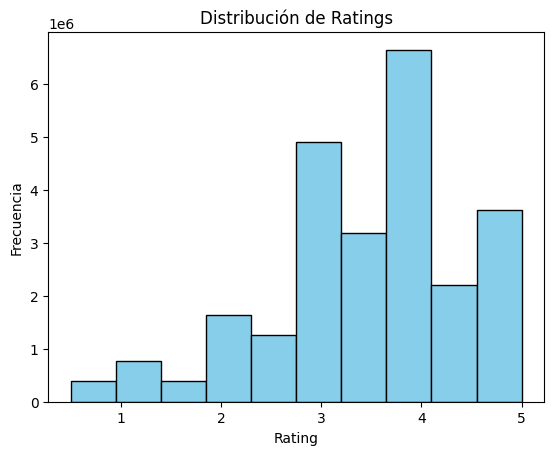

In [10]:
# Crear un histograma de la variable 'rating'
plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')

# Mostrar la gráfica
plt.show()

Dentro de este análisis podemos observar como el gráfico se concentra en calificaciones de 3.5 y muy pocas películas, hablando proporcionalmente, tienen bajas calificaciones.

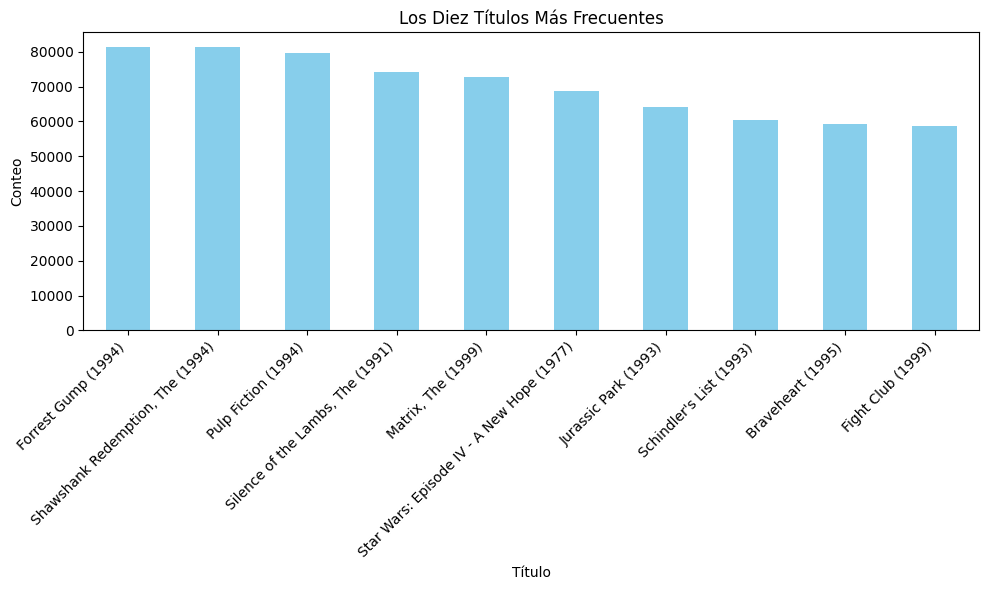

In [11]:
# Conteo de los diez títulos más frecuentes
top_titles = df['title'].value_counts().head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
top_titles.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('Los Diez Títulos Más Frecuentes')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

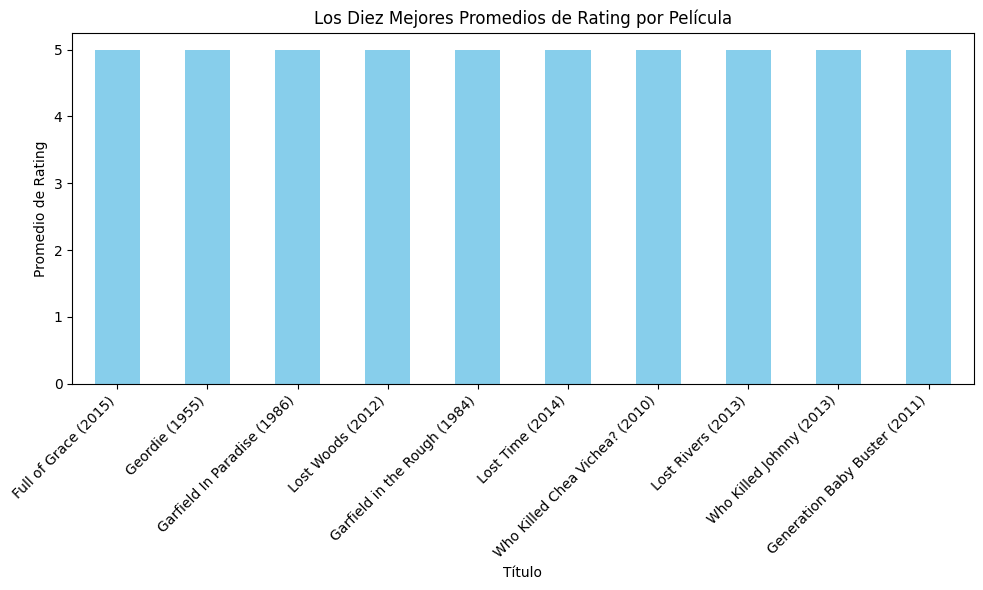

In [12]:

# Calcular el promedio de la variable 'rating' para cada película
average_ratings = df.groupby('title')['rating'].mean()

# Ordenar los promedios de manera descendente y seleccionar los diez mejores
top_10_ratings = average_ratings.sort_values(ascending=False).head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
top_10_ratings.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Título')
plt.ylabel('Promedio de Rating')
plt.title('Los Diez Mejores Promedios de Rating por Película')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

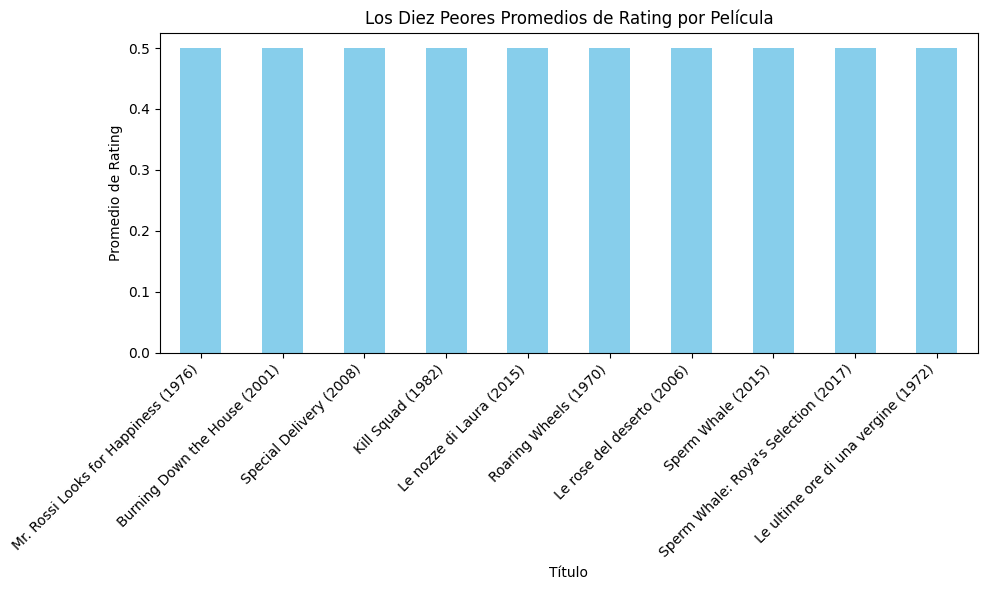

In [13]:
# Calcular el promedio de la variable 'rating' para cada película
average_ratings = df.groupby('title')['rating'].mean()

# Ordenar los promedios de manera ascendente y seleccionar los diez peores
bottom_10_ratings = average_ratings.sort_values().head(10)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
bottom_10_ratings.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Título')
plt.ylabel('Promedio de Rating')
plt.title('Los Diez Peores Promedios de Rating por Película')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [14]:
# Contar los valores vacíos en cada columna
missing_values_count = df.isna().sum()

# Mostrar el conteo de valores vacíos en cada columna
print("Valores vacíos en cada columna:")
print(missing_values_count)

Valores vacíos en cada columna:
userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


##Proceso de preprocesamiento

Para el preprocesamiento de datos primero fue necesario cargar las bases de datos por medio de las librerías gdown y pandas, ya que el archivo csv fue utilizado desde drive, el cual, con su url fue suficiente para cargar las dos bases de datos, que después fueron unidas mediante su llave foránea que fue movieId para poder continuar con nuestro primer paso.

Después de realizar esto se hizo una exploración de datos para entender su estructura, características y posibles problemas que se pudieran generar. Se utilizó el método describe() para poder analizar las variables numéricas. Después de esto también se realizó un análisis de variables categóricas, mediante el estudio de raiting promedio, esto con el propósito de conocer cuales eran las 10 mejores o peores películas en base a la experiencia de los usuarios o también los diez títulos mas vistos por parte de usuarios, es decir los más populares

Para continuar con nuestro proceso se intentó encontrar variables faltantes dentro de la base de datos, el resultado fue que no hubo falta de datos en ninguna columna.


In [15]:
lista_data1 = ['userId','movieId','rating']
lista_data2 = ['movieId','title']

data1a = data[lista_data1]
data2a = data2[lista_data2]

df_combinado = pd.merge(data1a, data2a, on='movieId')

In [16]:
df_combinado.head(5)

,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994)
2,1,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993)
3,1,665,5.0,Underground (1995)
4,1,899,3.5,Singin' in the Rain (1952)


In [17]:
# Check for duplicate entries
df_combinado = df_combinado.groupby(['title', 'userId'], as_index=False).agg({'rating': 'mean'})
df_combinado.reset_index(drop=True, inplace=True)

In [18]:
df_combinado.head(5)

,title,userId,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",134530,3.0
1,"""Great Performances"" Cats (1998)",1262,4.5
2,"""Great Performances"" Cats (1998)",1282,4.5
3,"""Great Performances"" Cats (1998)",1793,4.0
4,"""Great Performances"" Cats (1998)",1833,3.0


# Probamos con un algoritmo de recomendación (SVD)

In [19]:
# Delete all duplicates (same useriId and movieId)
df_combinado = df_combinado.drop_duplicates(subset=['userId', 'title'], keep='first')

In [20]:
# Create a sample of the DataFrame
sample_df = df_combinado.sample(frac=0.001, random_state=42)
UtMx_movies = sample_df.pivot_table(values='rating', index='title', columns='userId', fill_value=0)

In [21]:
nc_movies = 10    # número de componentes

SVD_movies = TruncatedSVD( n_components = nc_movies )
SVD_movies.fit(UtMx_movies)

# Determinemos la cantidad de componentes que explican un 90%
# de la variabilidad acumulada de cada componente:

for j in range(nc_movies):
  if SVD_movies.explained_variance_ratio_[0:j].sum() > 0.90:
    break

# Usaremos esta cantidad de componentes para las recomendaciones basadas
# en la calificación de la comida:
N_movies = j-1

print('Total de valores singulares basados en evaluación de la :', nc_movies)
print('Valor de truncamiento al 90% de dicha variabilidad:',N_movies)

Total de valores singulares basados en evaluación de la : 10
Valor de truncamiento al 90% de dicha variabilidad: 8


In [22]:
# Get movies that title contains 'Star Wars'
star_wars = df_combinado[df_combinado['title'].str.contains('Star Wars')]
print(star_wars["title"].unique())

["Empire of Dreams: The Story of the 'Star Wars' Trilogy (2004)"
 'Plastic Galaxy: The Story of Star Wars Toys (2014)'
 'Robot Chicken: Star Wars (2007)'
 'Robot Chicken: Star Wars Episode II (2008)'
 'Robot Chicken: Star Wars Episode III (2010)'
 'Rogue One: A Star Wars Story (2016)' 'Solo: A Star Wars Story (2018)'
 'Star Wars Downunder (2013)' 'Star Wars: Dresca'
 'Star Wars: Episode I - The Phantom Menace (1999)'
 'Star Wars: Episode II - Attack of the Clones (2002)'
 'Star Wars: Episode III - Revenge of the Sith (2005)'
 'Star Wars: Episode IV - A New Hope (1977)'
 'Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Star Wars: Episode VI - Return of the Jedi (1983)'
 'Star Wars: Episode VII - The Force Awakens (2015)'
 'Star Wars: The Clone Wars (2008)' 'Star Wars: The Last Jedi (2017)'
 'Star Wars: The Legacy Revealed (2007)'
 'Star Wars: Threads of Destiny (2014)'
 'The Star Wars Holiday Special (1978)']


In [23]:
# Factorización SVD:
SVD_movies = TruncatedSVD(n_components = N_movies)
resultant_matrix_movies = SVD_movies.fit_transform(UtMx_movies)

# Matriz de correlación de Pearson:
corr_mat_movies = np.corrcoef(resultant_matrix_movies)

# Obtenemos una película de referencia:
pelicula_de_referencia = df_combinado['title'].sample(1).values[0]
print('Película de referencia:', pelicula_de_referencia)
nombres_rest = UtMx_movies.T.columns  # nombres de restaurantes
idx_rest = list(nombres_rest).index(pelicula_de_referencia)
corr_rest = corr_mat_movies[idx_rest] # Vector de Correlación

# Buscando las correlaciones positivas:
idx = (corr_rest>0)
mejores_sim_movies = list()
for i in range(len(nombres_rest[idx])):
  mejores_sim_movies.append((corr_rest[idx][i], nombres_rest[idx][i]))

print('Total de similaridades positivas encontradas:', len(mejores_sim_movies))

mejores_sim_movies_ordenadas = sorted(mejores_sim_movies, reverse=True)

# Desplegamos las 10 mejores similitudes encontradas de manera descendente:
print('Similitudes con base a la evaluación de las calificaciones con mayores valores de correlación:')
for k in range(1,11):
  print('%d> %s' % (k, mejores_sim_movies_ordenadas[k]))

Película de referencia: Godzilla (Gojira) (1954)
Total de similaridades positivas encontradas: 3000
Similitudes con base a la evaluación de las calificaciones con mayores valores de correlación:
1> (0.9530669606649255, 'Letters to Juliet (2010)')
2> (0.9518354344259626, 'Gold Diggers: The Secret of Bear Mountain (1995)')
3> (0.9388664807157329, 'Confessions of a Shopaholic (2009)')
4> (0.9367969912157522, 'Rhinestone (1984)')
5> (0.9274103405477329, 'Prescription Thugs (2016)')
6> (0.9202047952766305, 'Saw VII 3D - The Final Chapter (2010)')
7> (0.920027829569935, 'Ghostbusters (2016)')
8> (0.9186398400233375, 'Young Goethe in Love (2011)')
9> (0.9186398400233375, 'The Inhabited Island (2008)')
10> (0.9162967991916966, 'Babe: Pig in the City (1998)')


# Probamos con otro algoritmo de recomendación (KNN)

In [24]:
from sklearn.neighbors import NearestNeighbors  

In [25]:
df_combinado = pd.merge(data1a, data2a, on='movieId')
ratings = data1a
movies = data2a

In [26]:
user_freq = ratings[['userId', 'movieId']].groupby(
    'userId').count().reset_index()
user_freq.columns = ['userId', 'n_ratings']
print(user_freq.head())

   userId  n_ratings
0       1         70
1       2        184
2       3        656
3       4        242
4       5        101


In [27]:
# Find Lowest and Highest rated movies:
mean_rating = ratings.groupby('movieId')[['rating']].mean()
# Lowest rated movies
lowest_rated = mean_rating['rating'].idxmin()
movies.loc[movies['movieId'] == lowest_rated]
# Highest rated movies
highest_rated = mean_rating['rating'].idxmax()
movies.loc[movies['movieId'] == highest_rated]
# show number of people who rated movies rated movie highest
ratings[ratings['movieId']==highest_rated]
# show number of people who rated movies rated movie lowest
ratings[ratings['movieId']==lowest_rated]

## the above movies has very low dataset. We will use bayesian average
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()


In [28]:
# Now, we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix

def create_matrix(df):
	
	N = len(df['userId'].unique())
	M = len(df['movieId'].unique())
	
	# Map Ids to indices
	user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
	movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
	
	# Map indices to IDs
	user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
	movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
	
	user_index = [user_mapper[i] for i in df['userId']]
	movie_index = [movie_mapper[i] for i in df['movieId']]

	X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
	
	return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper
	
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_matrix(ratings)


In [29]:
# Get the ID of toy story
movies[movies['title'].str.contains('Toy Story')]

,movieId,title
0,1,Toy Story (1995)
3021,3114,Toy Story 2 (1999)
14813,78499,Toy Story 3 (2010)
20497,106022,Toy Story of Terror (2013)
22633,115875,Toy Story Toons: Hawaiian Vacation (2011)
22634,115879,Toy Story Toons: Small Fry (2011)
24062,120468,Toy Story Toons: Partysaurus Rex (2012)
24064,120474,Toy Story That Time Forgot (2014)
59767,201588,Toy Story 4 (2019)


In [30]:
"""
Find similar movies using KNN
"""
def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
	
	neighbour_ids = []
	
	movie_ind = movie_mapper[movie_id]
	movie_vec = X[movie_ind]
	k+=1
	kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
	kNN.fit(X)
	movie_vec = movie_vec.reshape(1,-1)
	neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
	for i in range(0,k):
		n = neighbour.item(i)
		neighbour_ids.append(movie_inv_mapper[n])
	neighbour_ids.pop(0)
	return neighbour_ids


movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 3114 # Toy Story

similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles[movie_id]

print(f"Como viste {movie_title}, te recomendamos:")
for i in similar_ids:
	print(movie_titles[i])


Como viste Toy Story 2 (1999), te recomendamos:
Toy Story (1995)
Bug's Life, A (1998)
Monsters, Inc. (2001)
Shrek (2001)
Finding Nemo (2003)
Ghostbusters (a.k.a. Ghost Busters) (1984)
Chicken Run (2000)
Men in Black (a.k.a. MIB) (1997)
Back to the Future (1985)
Sixth Sense, The (1999)


In [31]:
def recommend_movies_for_user(user_id, X, user_mapper, movie_mapper, movie_inv_mapper, k=10):
	df1 = ratings[ratings['userId'] == user_id]
	
	if df1.empty:
		print(f"Usuario con ID {user_id} no existe.")
		return

	movie_id = df1[df1['rating'] == max(df1['rating'])]['movieId'].iloc[0]

	movie_titles = dict(zip(movies['movieId'], movies['title']))

	similar_ids = find_similar_movies(movie_id, X, k)
	movie_title = movie_titles.get(movie_id, "película no encontrada")

	if movie_title == "Movie not found":
		print(f"La película con ID {movie_id} no se encontró.")
		return

	print(f"Como viste {movie_title}, te recomendamos:")
	for i in similar_ids:
		print(movie_titles.get(i, "película no encontrada"))


In [32]:
user_id = 100 # Replace with the desired user ID
recommend_movies_for_user(user_id, X, user_mapper, movie_mapper, movie_inv_mapper, k=10)


Como viste Dead Man (1995), te recomendamos:
Ghost Dog: The Way of the Samurai (1999)
Down by Law (1986)
Coffee and Cigarettes (2003)
Night on Earth (1991)
Lost Highway (1997)
Stranger Than Paradise (1984)
Mystery Train (1989)
Barton Fink (1991)
Brazil (1985)
Broken Flowers (2005)


# Usamos similitud de cosenos

In [4]:
ratings = data.sample(frac=0.001, random_state=1)
# Make a matrix where the id is the userId and have a column for each movieId (the value is the rating)
ratings_matrix = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,203312,203393,203513,203751,205383,205809,206531,206805,207345,208000
userId,,,,,,,,,,,,,,,,,,,,,
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creamos una matriz de correlación por cosenos

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(ratings_matrix, ratings_matrix)
print(f"Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: {cosine_sim.shape}")

Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: (20029, 20029)


In [10]:
from fuzzywuzzy import process

def encuentra_pelicula(title):
    all_titles = data2['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

title = encuentra_pelicula('star wars')
print(f"El titulo correcto de la pelicula es: {title}:")

El titulo correcto de la pelicula es: Star Wars: Episode IV - A New Hope (1977):


Buscamos los vectores más cercanos basado en las recomendaciones de los usuarios

In [11]:
movie_idx = dict(zip(data2['title'], list(data2.index)))
idx = movie_idx[title]
print(f"El indice de la pelicula {title} en la matriz movie_idx es: {idx}")
numero_recomendaciones=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(numero_recomendaciones+1)]
similar_movies = [i[0] for i in sim_scores]

El indice de la pelicula Star Wars: Episode IV - A New Hope (1977) en la matriz movie_idx es: 257


In [12]:
print(f"Por que miraste la pelicula {title}, te pueden interesar las siguientes {numero_recomendaciones} peliculas:")
data2['title'].iloc[similar_movies]

Por que miraste la pelicula Star Wars: Episode IV - A New Hope (1977), te pueden interesar las siguientes 10 peliculas:


324                      Star Trek: Generations (1994)
5046                           We Were Soldiers (2002)
5783               Making Contact (a.k.a. Joey) (1985)
5871                         Invaders from Mars (1953)
6500                                 Passionada (2002)
7281                         Flying Deuces, The (1939)
7681                   Night of the Living Dead (1990)
9061                                Chicago Cab (1997)
9982     Sisterhood of the Traveling Pants, The (2005)
11618                            Eagle vs Shark (2007)
Name: title, dtype: object

In [13]:
def obtener_recomendaciones_basadas_contenido(title_string, numero_recomendaciones=10):
    title = encuentra_pelicula(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(numero_recomendaciones+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Las peliculas recomendadas con base en la pelicula {title} son:")
    print(data2['title'].iloc[similar_movies])

In [16]:
obtener_recomendaciones_basadas_contenido('aladin', 5)

Las peliculas recomendadas con base en la pelicula Aladin (2009) son:
805            Collector, The (La collectionneuse) (1967)
2859    Fistful of Dollars, A (Per un pugno di dollari...
4626                                    Bubble Boy (2001)
4895                                        Sahara (1943)
6502                                  Camp Nowhere (1994)
Name: title, dtype: object


# Algoritmo de predicción con red neuronal

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [8]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

data = data[:10000]

# Ensure the data types are correct
data['userId'] = data['userId'].astype(int)
data['movieId'] = data['movieId'].astype(int)
data['rating'] = data['rating'].astype(float)

# Create a sparse matrix
row = data['userId'].values
col = data['movieId'].values
rating = data['rating'].values

# Create a csr matrix
sparse_matrix = csr_matrix((rating, (row, col)), shape=(data['userId'].max() + 1, data['movieId'].max() + 1))

# Split the data into training and testing sets
train_data, test_data = train_test_split(sparse_matrix, test_size=0.2, random_state=42)

class SparseDataset(Dataset):
    def __init__(self, sparse_matrix):
        self.sparse_matrix = sparse_matrix.tocoo()
        self.row = torch.LongTensor(self.sparse_matrix.row)
        self.col = torch.LongTensor(self.sparse_matrix.col)
        self.rating = torch.FloatTensor(self.sparse_matrix.data)

    def __len__(self):
        return len(self.rating)

    def __getitem__(self, idx):
        return self.row[idx], self.col[idx], self.rating[idx]

# Create data loaders
train_dataset = SparseDataset(train_data)
test_dataset = SparseDataset(test_data)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

Using device: cuda


In [9]:
class Autoencoder(nn.Module):
    def __init__(self, num_users, num_movies):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_movies, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, num_movies),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

num_users, num_movies = sparse_matrix.shape
model = Autoencoder(num_users, num_movies).to(device)  # Move model to GPU
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for row, col, rating in train_loader:
        row, col, rating = row.to(device), col.to(device), rating.to(device)  # Move data to GPU
        inputs = torch.zeros(len(row), num_movies, device=device)  # Initialize inputs on GPU
        inputs[range(len(row)), col] = rating

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for row, col, rating in test_loader:
            row, col, rating = row.to(device), col.to(device), rating.to(device)  # Move data to GPU
            inputs = torch.zeros(len(row), num_movies, device=device)  # Initialize inputs on GPU
            inputs[range(len(row)), col] = rating

            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            test_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Test Loss: {test_loss/len(test_loader):.4f}')

Epoch [1/10], Train Loss: 0.2004, Test Loss: 0.0906
Epoch [2/10], Train Loss: 0.0144, Test Loss: 0.0001
Epoch [3/10], Train Loss: 0.0001, Test Loss: 0.0001
Epoch [4/10], Train Loss: 0.0001, Test Loss: 0.0001
Epoch [5/10], Train Loss: 0.0001, Test Loss: 0.0001
Epoch [6/10], Train Loss: 0.0001, Test Loss: 0.0001
Epoch [7/10], Train Loss: 0.0001, Test Loss: 0.0001
Epoch [8/10], Train Loss: 0.0001, Test Loss: 0.0001
Epoch [9/10], Train Loss: 0.0001, Test Loss: 0.0001
Epoch [10/10], Train Loss: 0.0001, Test Loss: 0.0001


In [16]:
# Evaluate the model on test data
model.eval()
test_loss = 0
with torch.no_grad():
    for row, col, rating in test_loader:
        row, col, rating = row.to(device), col.to(device), rating.to(device)  # Move data to GPU
        inputs = torch.zeros(len(row), num_movies, device=device)  # Initialize inputs on GPU
        inputs[range(len(row)), col] = rating

        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        test_loss += loss.item()
print(f'Test Loss: {test_loss/len(test_loader):.4f}')

# Get predictions
with torch.no_grad():
    full_inputs = torch.zeros(num_users, num_movies, device=device)
    full_inputs[train_dataset.row, train_dataset.col] = train_dataset.rating.to(device)
    full_predictions = model(full_inputs).cpu()  # Move predictions back to CPU for further processing

# Function to recommend movies
def recommend_movies(user_id, num_recommendations=5):
    user_idx = user_id
    user_ratings = full_predictions[user_idx].numpy()
    recommendations = np.argsort(user_ratings)[-num_recommendations:][::-1]
    return recommendations

# Example: Recommend 5 movies for user with userId=1
recommended_movies = recommend_movies(5, 5)
print(recommended_movies)

# print the names of the recommended movies
movie_titles = dict(zip(data2['movieId'], data2['title']))
for movie in recommended_movies:
    if movie in movie_titles:
        print(movie_titles[movie])

Test Loss: 0.0001
[203519  67847  67845  67844  67843]
Fast & Furious Presents: Hobbs & Shaw (2019)
Cialo (2003)
My Friend Henry (Ystäväni Henry) (2004)
